In [1]:
import pandas as pd 
import os

os.getcwd()

'/Users/kamil/Documents/insomnyak-llc/development/python-dev/udemy_data_science_course_5499048'

In [2]:
movies = pd.read_csv('data/P4-Movie-Ratings.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [4]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', \
    'BudgetMillions', 'YearOfRelease']
movies.head()

Film      Genre  CriticRating  AudienceRating  \
0  (500) Days of Summer      Comedy            87              81   
1            10,000 B.C.  Adventure             9              44   
2             12 Rounds      Action            30              52   
3              127 Hours  Adventure            93              84   
4              17 Again      Comedy            55              70   

   BudgetMillions  YearOfRelease  
0               8           2009  
1             105           2008  
2              20           2009  
3              18           2010  
4              20           2009

In [6]:
movies.describe()

CriticRating  AudienceRating  BudgetMillions  YearOfRelease
count    559.000000      559.000000      559.000000     559.000000
mean      47.309481       58.744186       50.236136    2009.152057
std       26.413091       16.826887       48.731817       1.362632
min        0.000000        0.000000        0.000000    2007.000000
25%       25.000000       47.000000       20.000000    2008.000000
50%       46.000000       58.000000       35.000000    2009.000000
75%       70.000000       72.000000       65.000000    2010.000000
max       97.000000       96.000000      300.000000    2011.000000

In [7]:
movies.Film = movies.Film.astype('category') # in R, categories are called factors
movies.Genre = movies.Genre.astype('category')
movies.YearOfRelease = movies.YearOfRelease.astype('category')

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
YearOfRelease     559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [9]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [10]:
movies.describe()

CriticRating  AudienceRating  BudgetMillions
count    559.000000      559.000000      559.000000
mean      47.309481       58.744186       50.236136
std       26.413091       16.826887       48.731817
min        0.000000        0.000000        0.000000
25%       25.000000       47.000000       20.000000
50%       46.000000       58.000000       35.000000
75%       70.000000       72.000000       65.000000
max       97.000000       96.000000      300.000000

In [11]:
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 8, 4
sns.set_style('darkgrid')

# Jointplots

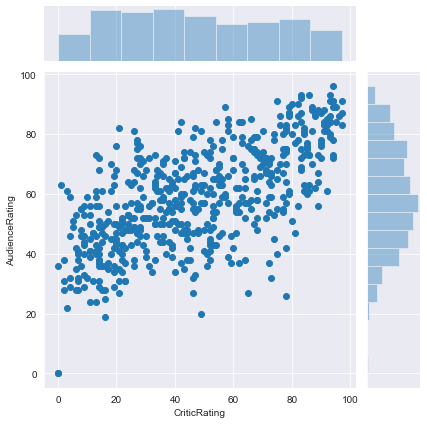

In [12]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

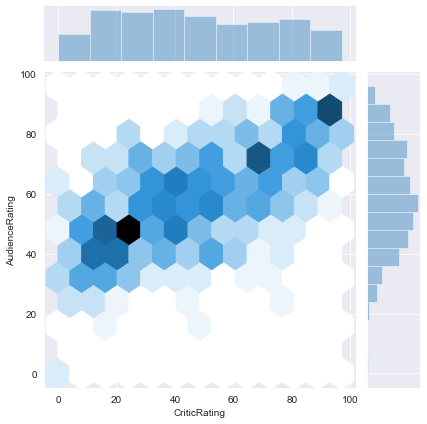

In [13]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

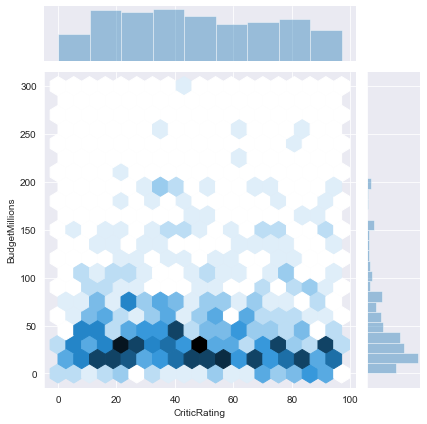

In [14]:
j = sns.jointplot(data=movies, x='CriticRating', y='BudgetMillions', kind='hex')

# Histograms

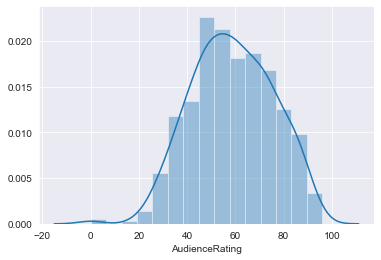

In [15]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

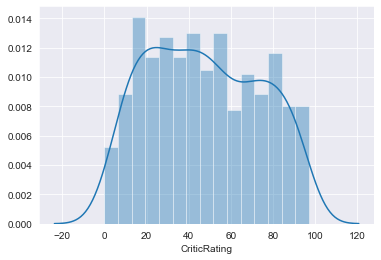

In [16]:
m2 = sns.distplot(movies.CriticRating, bins=15)

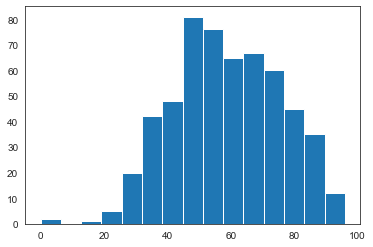

In [17]:
# using pyplot
sns.set_style('white')
n1 = plt.hist(movies.AudienceRating, bins=15)

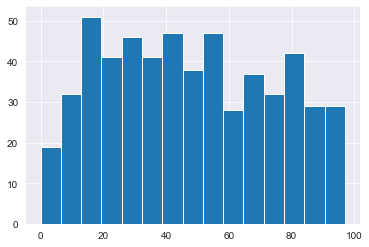

In [18]:
sns.set_style('darkgrid')
n1 = plt.hist(movies.CriticRating, bins=15)

# Stacked Histograms

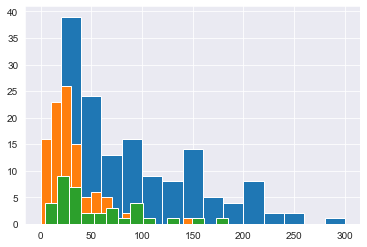

In [19]:
# movies[movies.Genre == 'Drama'].BudgetMillions
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

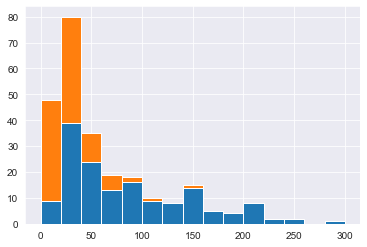

In [20]:
g_list = [movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions]
plt.hist(g_list, bins=15, stacked=True)
plt.show()

In [21]:
# movies.Genre.cat.categories
movies['Genre'].cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [22]:
def createStackedList(data, column, metric):
    tempList = []
    values = list()
    for value in data[column].cat.categories:
        tempList.append(data[data[column] == value][metric])
        values.append(value)
    return tempList, values

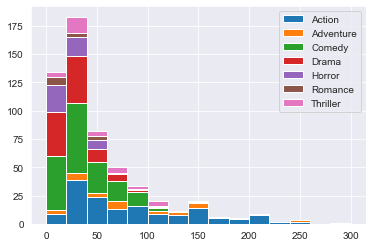

In [23]:
gList2, lbls = createStackedList(movies, 'Genre', 'BudgetMillions')
plt.hist(gList2, bins=15, stacked=True, rwidth=1, label=lbls)
plt.legend()
plt.show()

# KDE Plot: Kernel Density Estimate Plot

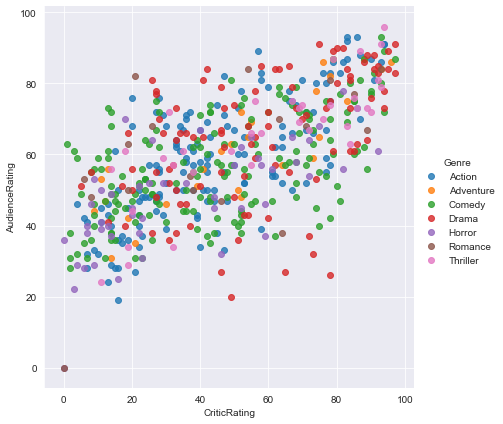

In [24]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, \
    hue='Genre', size=6, aspect=1)

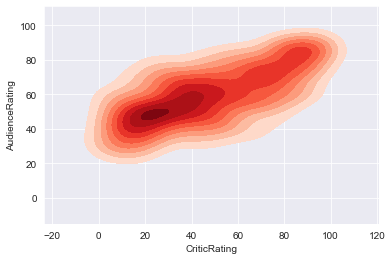

In [25]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')

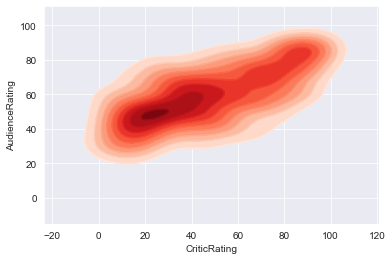

In [26]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')
# Tip: 
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

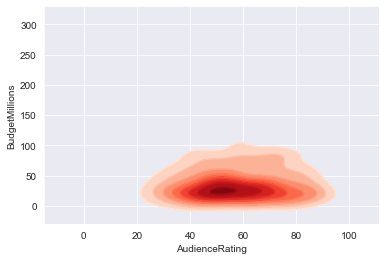

In [27]:
k1 = sns.kdeplot(movies.AudienceRating, movies.BudgetMillions, shade=True, shade_lowest=False, cmap='Reds')
# Tip: 
k1b = sns.kdeplot(movies.AudienceRating, movies.BudgetMillions, cmap='Reds')

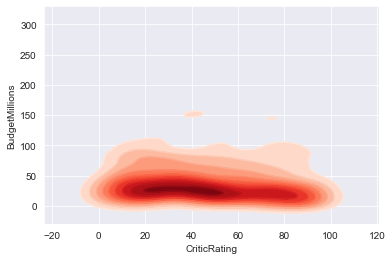

In [28]:
k1 = sns.kdeplot(movies.CriticRating, movies.BudgetMillions, shade=True, shade_lowest=False, cmap='Reds')
# Tip: 
k1b = sns.kdeplot(movies.CriticRating, movies.BudgetMillions, cmap='Reds')

# Subplots

In [29]:
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 8, 4
sns.set_style('darkgrid')

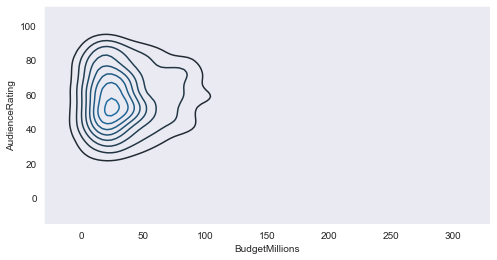

In [30]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

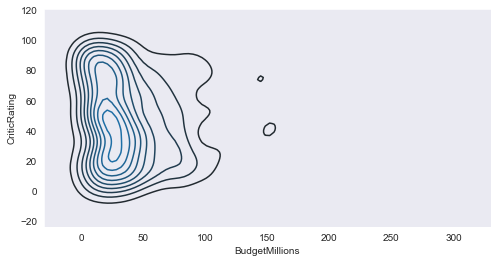

In [31]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

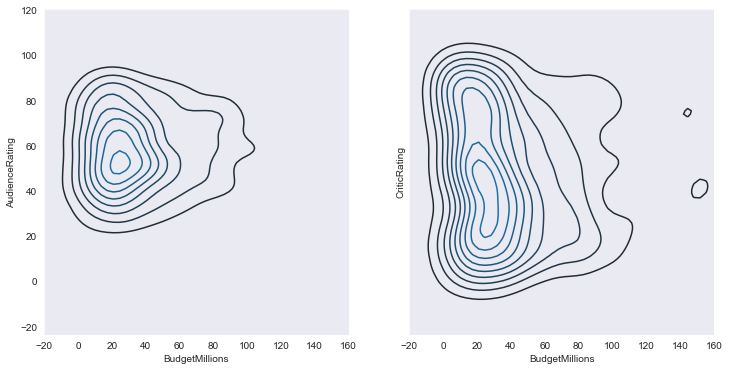

In [32]:
sns.set_style('dark')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[1])
k1.set(xlim=(-20, 160))

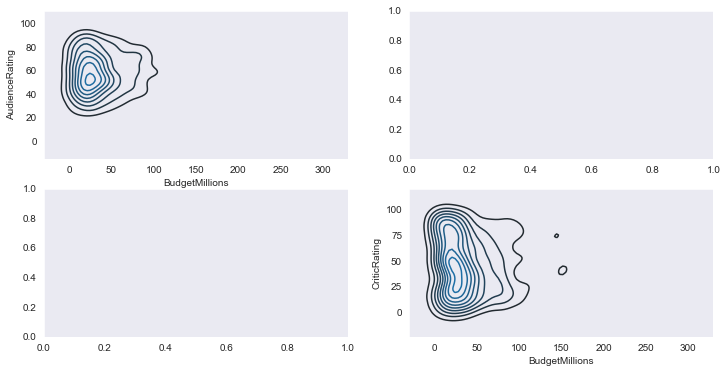

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=ax[0, 0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=ax[1, 1])

# Violin Plots & Box Plots

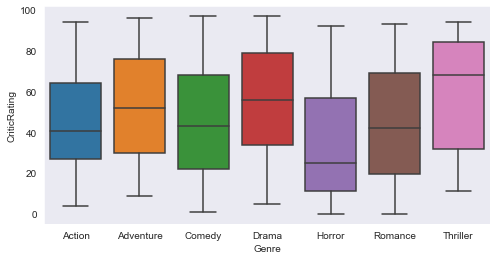

In [34]:
w = sns.boxplot(data=movies, x='Genre', y='CriticRating')

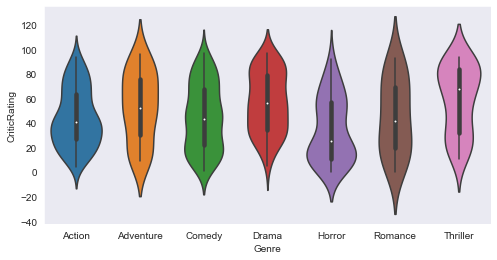

In [35]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

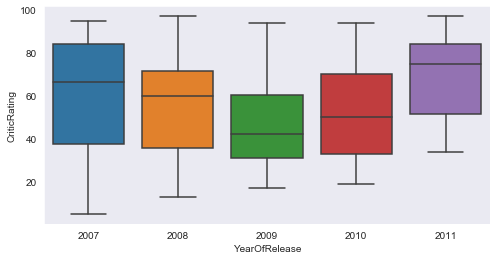

In [36]:
w1 = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='YearOfRelease', y='CriticRating')

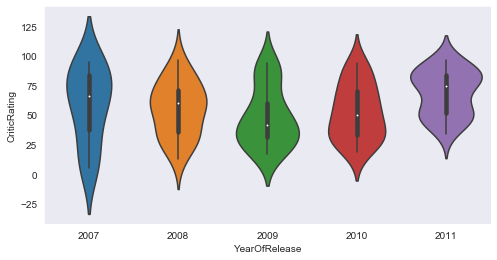

In [37]:
z1 = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='YearOfRelease', y='CriticRating')

# Facet Grids

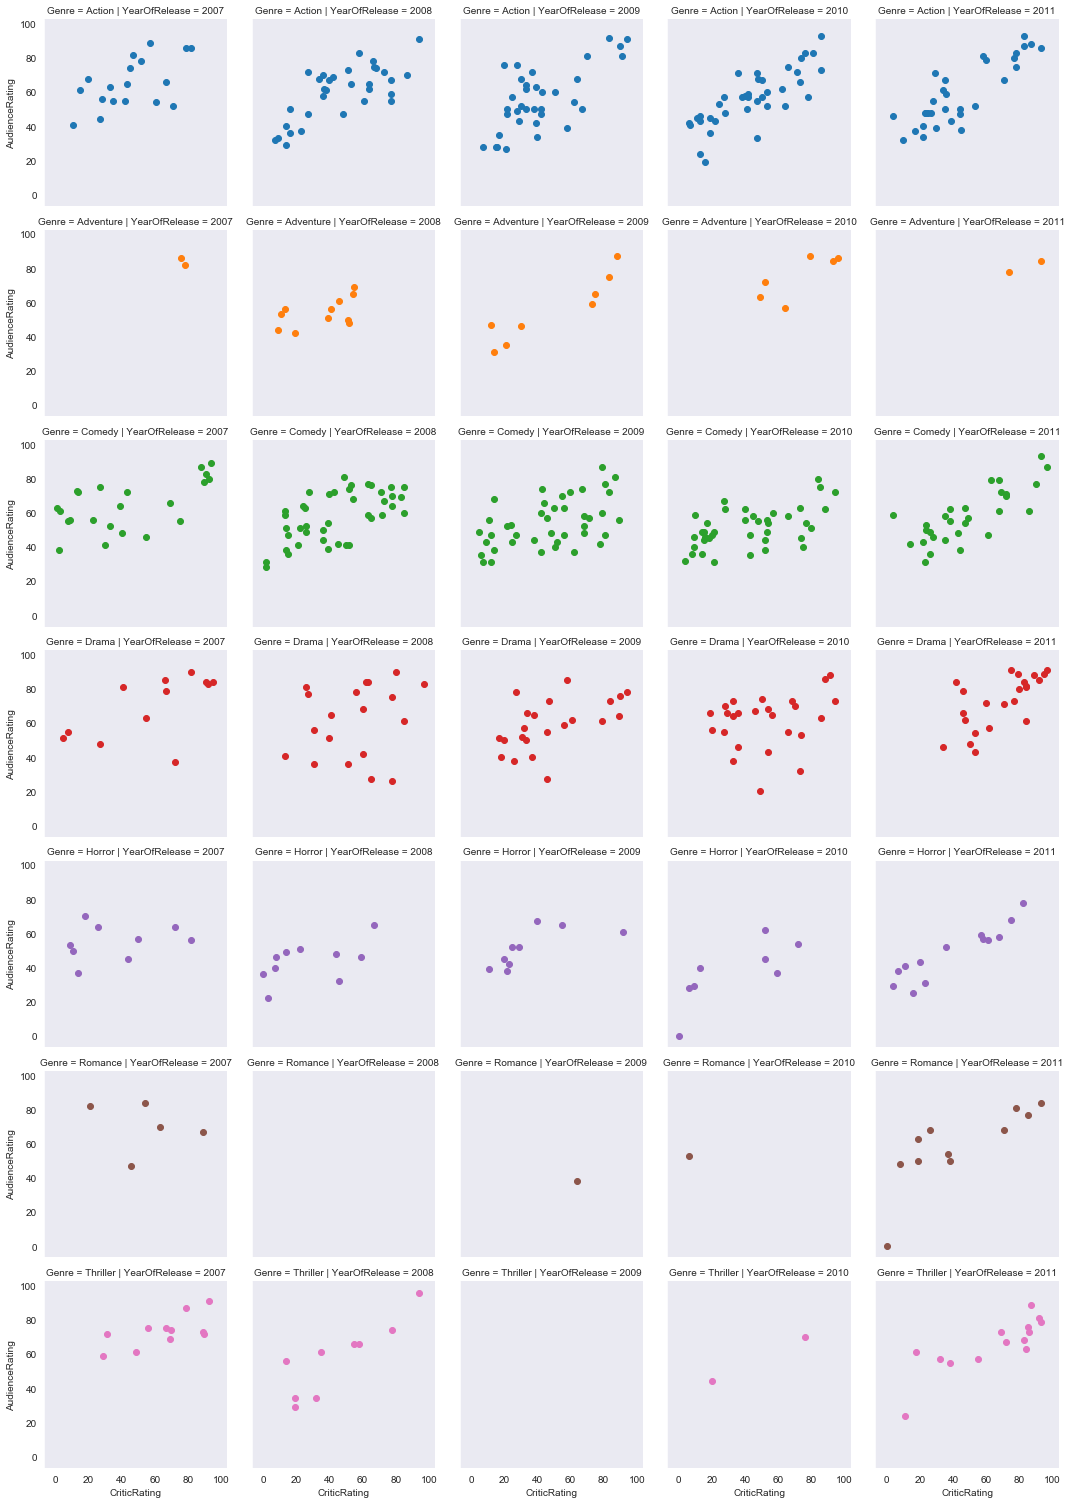

In [38]:
g = sns.FacetGrid(movies, row='Genre', col='YearOfRelease', hue='Genre')
# plt.scatter(movies.CriticRating, movies.AudienceRating)
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

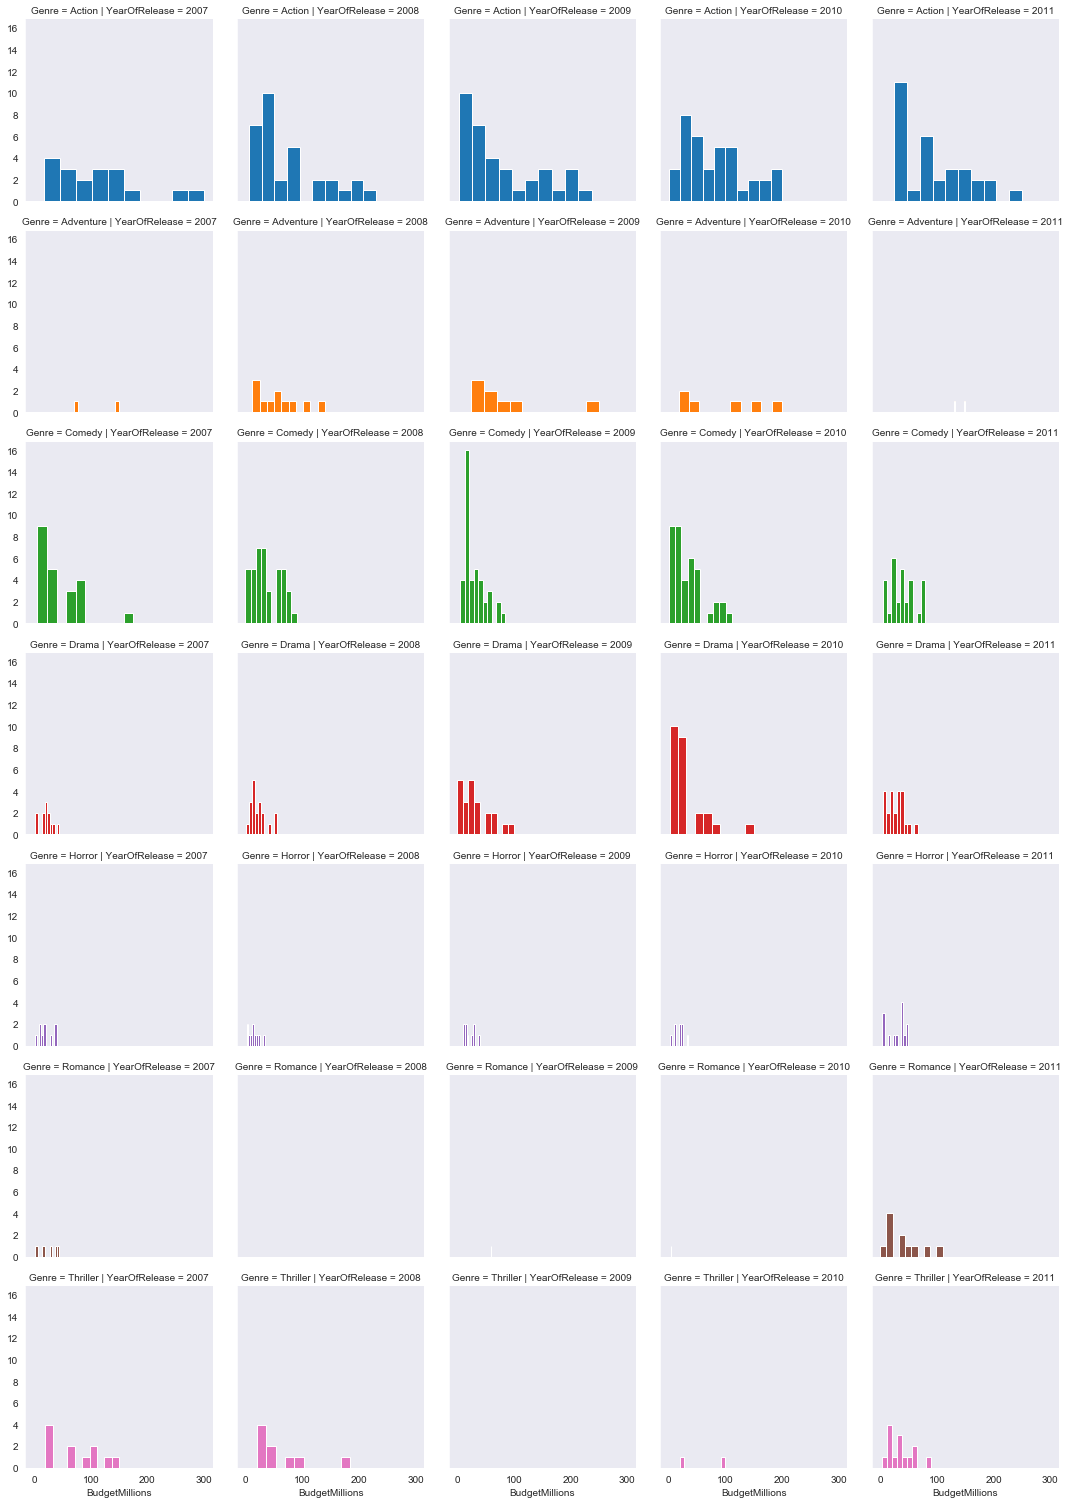

In [39]:
g = sns.FacetGrid(movies, row='Genre', col='YearOfRelease', hue='Genre')
# plt.scatter(movies.CriticRating, movies.AudienceRating)
g = g.map(plt.hist, 'BudgetMillions')

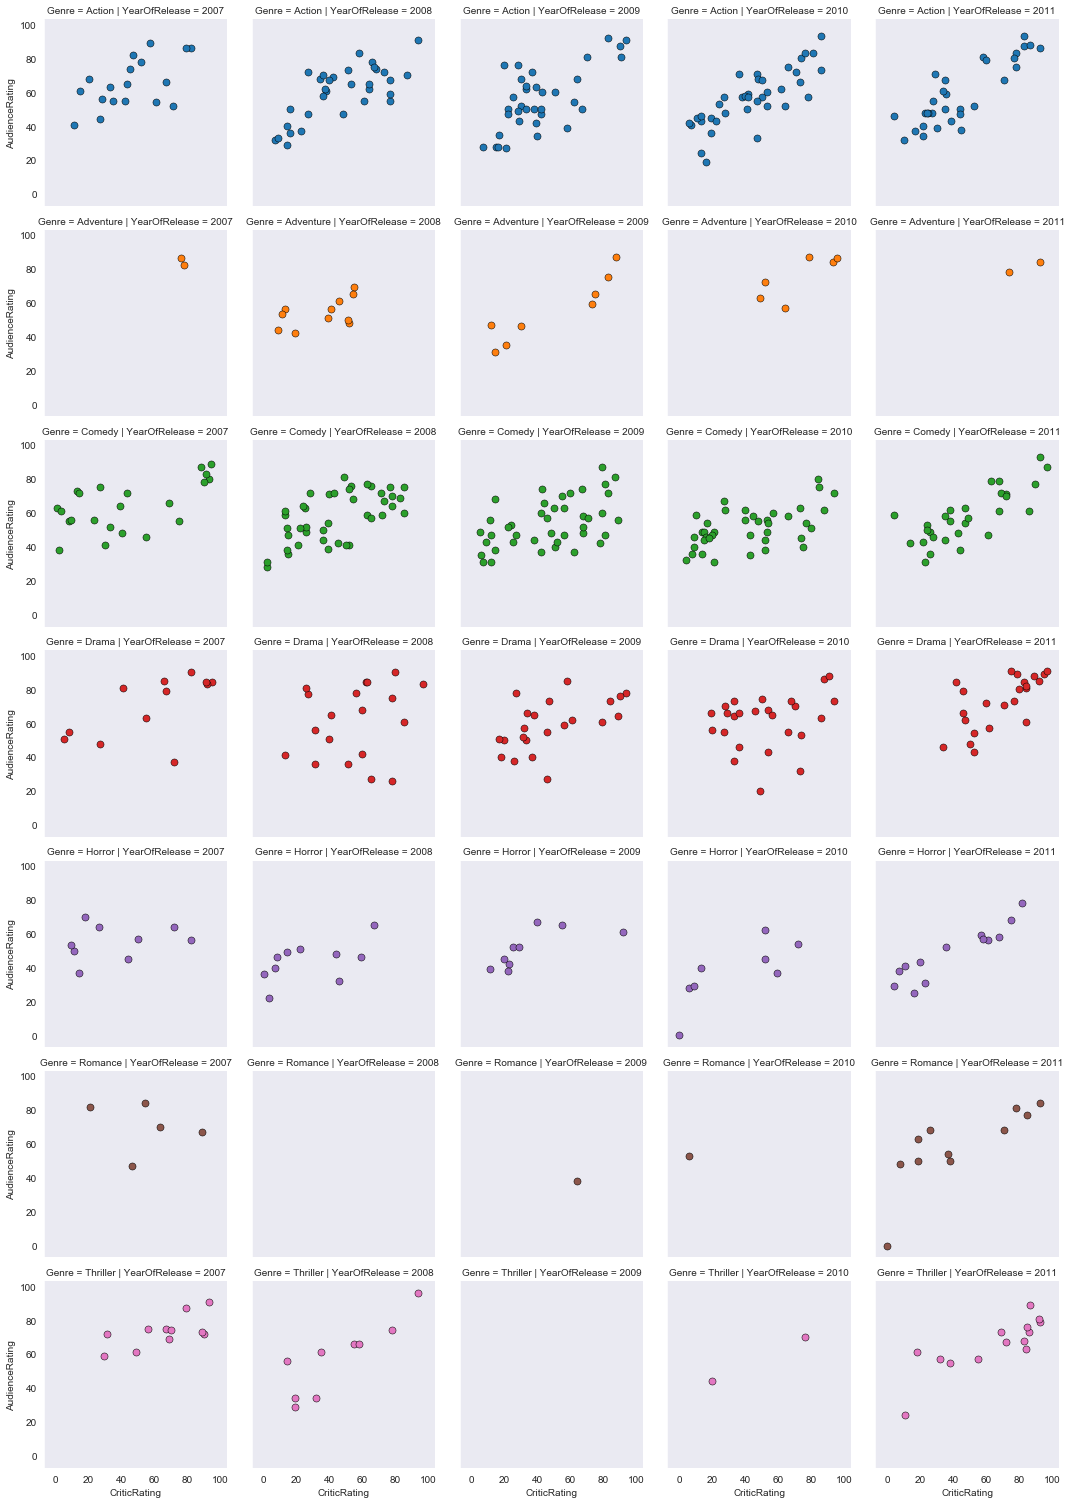

In [40]:
g = sns.FacetGrid(movies, row='Genre', col='YearOfRelease', hue='Genre')
# plt.scatter(movies.CriticRating, movies.AudienceRating)
kws = dict(s=50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

# Facet Grid: controlling axes and adding diagonals 

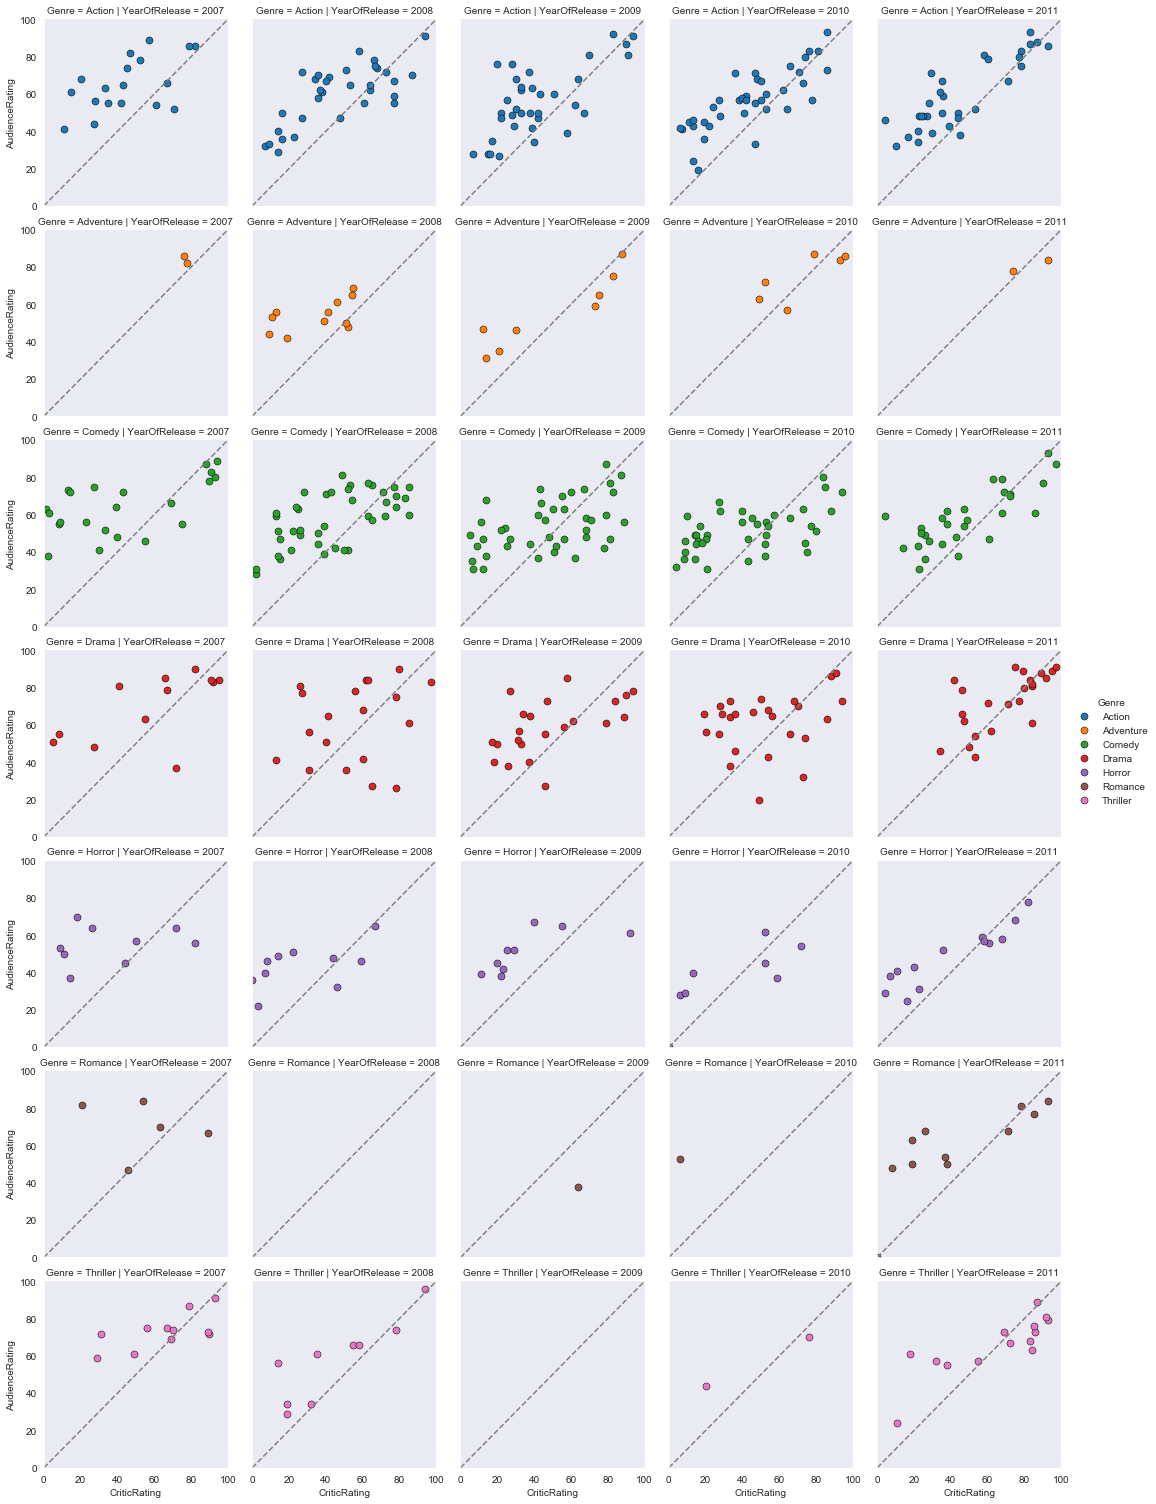

In [41]:
g = sns.FacetGrid(movies, row='Genre', col='YearOfRelease', hue='Genre')
# plt.scatter(movies.CriticRating, movies.AudienceRating)
kws = dict(s=50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0, 100))

for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c='gray', ls='--')

g.add_legend()

# Dashboards

In [42]:
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 8, 4
sns.set_style('darkgrid')

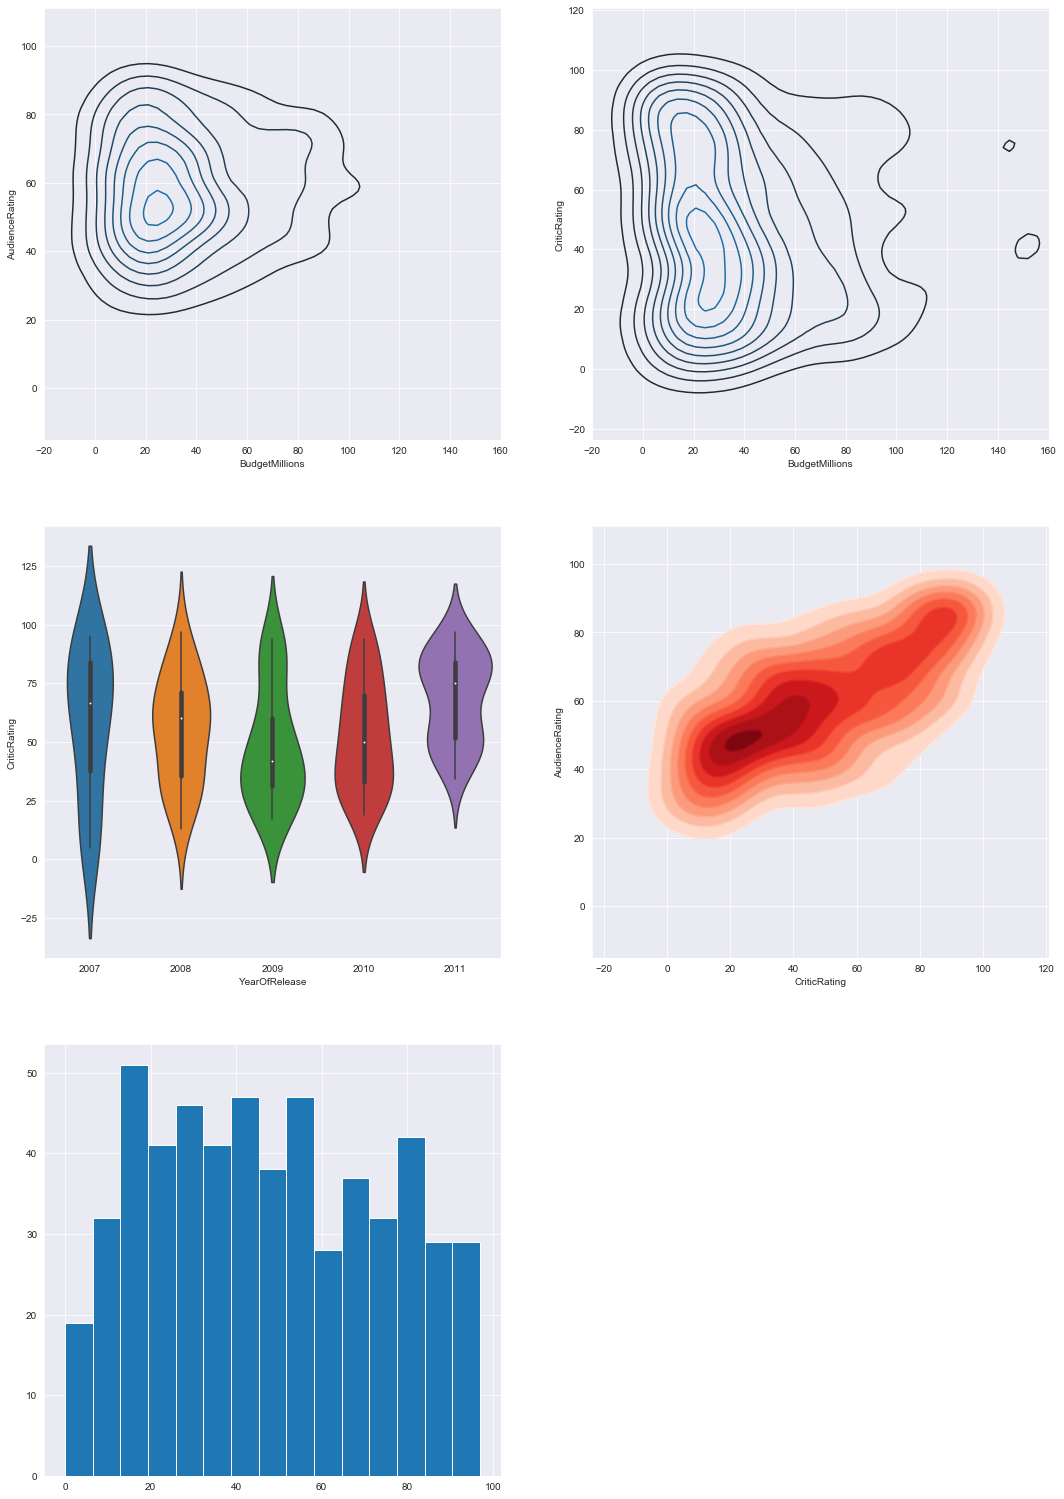

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(18, 27))

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0, 0])
k1.set(xlim=(-20, 160))

k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0, 1])
k2.set(xlim=(-20, 160))

z1 = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='YearOfRelease', y='CriticRating', ax=axes[1, 0])

kde1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1, 1])
kde1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds', ax=axes[1, 1])

axes[2, 0].hist(movies.CriticRating, bins=15)

axes[2, 1].remove()

plt.show()

# Dashboard Styling

In [44]:
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 8, 4
sns.set_style('darkgrid')

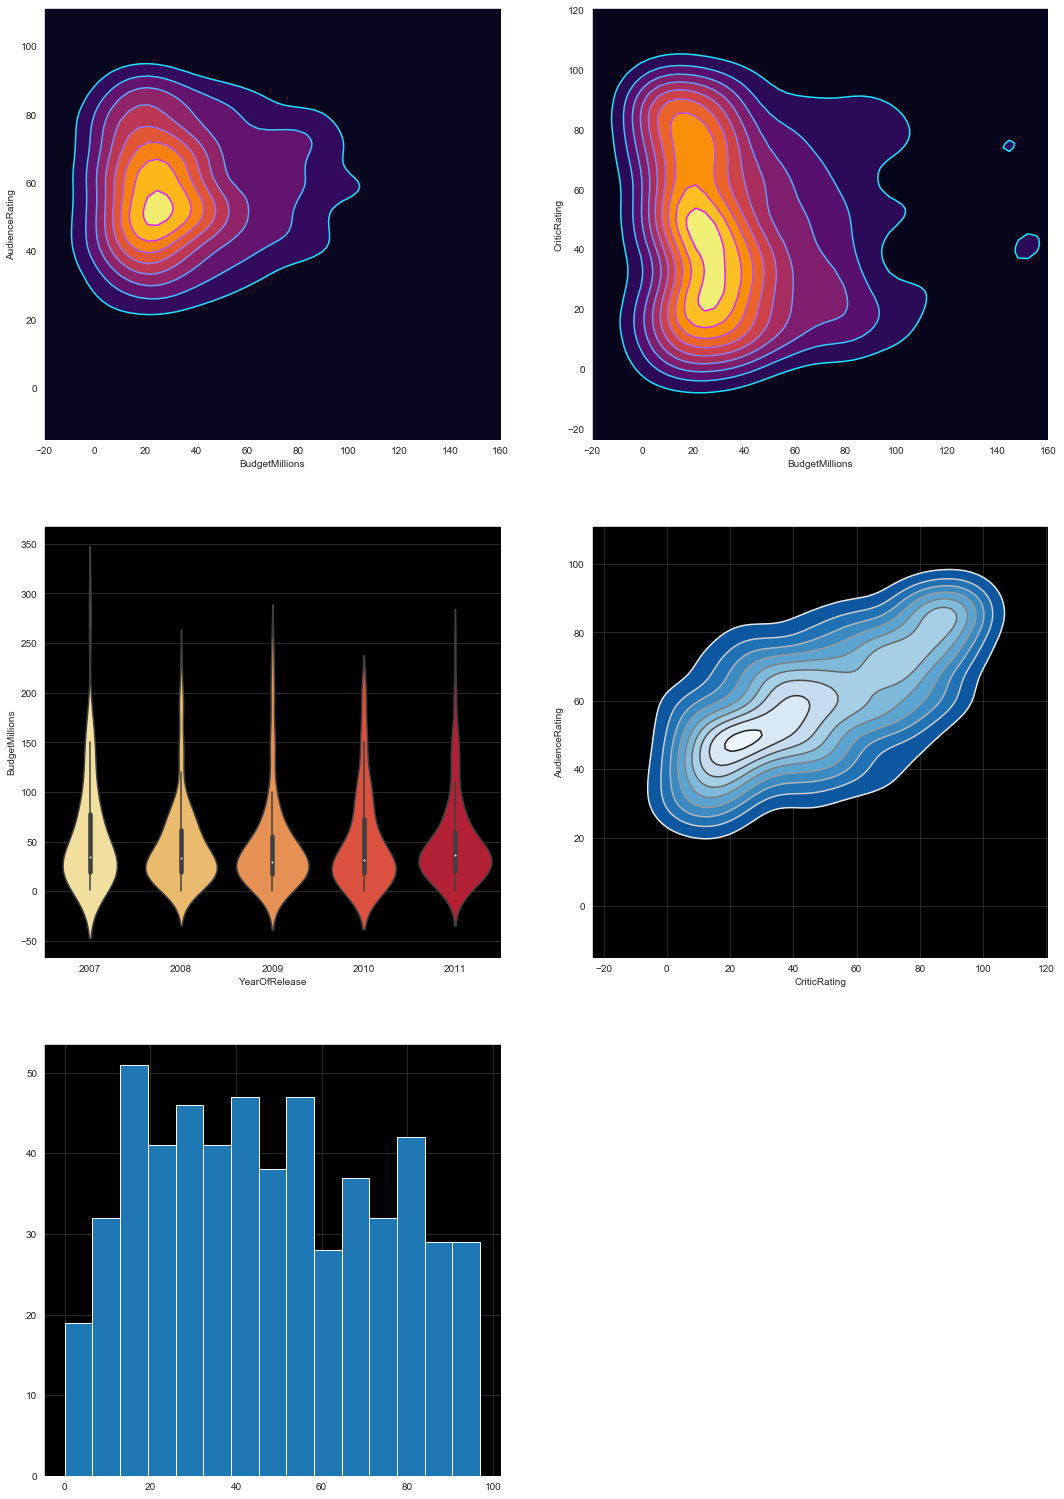

In [45]:
# sns.set_style('darkgrid') # white, whitegrid, dark, darkgrid, ticks
sns.set_style('darkgrid', {'axes.facecolor': 'black', 'grid.color': '.2'})

fig, axes = plt.subplots(3, 2, figsize=(18, 27))

# Plot [0, 0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0, 0], \
    shade=True, shade_lowest=True, cmap='inferno')
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0, 0], \
    cmap='cool')
k1.set(xlim=(-20, 160))


# Plot [0, 1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0, 1], \
    shade=True, shade_lowest=True, cmap='inferno')
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0, 1], \
    cmap='cool')
k2.set(xlim=(-20, 160))

# Plot [1, 0]
z1 = sns.violinplot(data=movies, x='YearOfRelease', y='BudgetMillions', ax=axes[1, 0], \
    palette='YlOrRd')

# Plot [1, 1]
kde1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1, 1])
kde1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=axes[1, 1])

# Plot [2, 0]
axes[2, 0].hist(movies.CriticRating, bins=15)

# Plot [2, 1]
axes[2, 1].remove()

plt.show()

In [46]:
import matplotlib.gridspec as gridspec

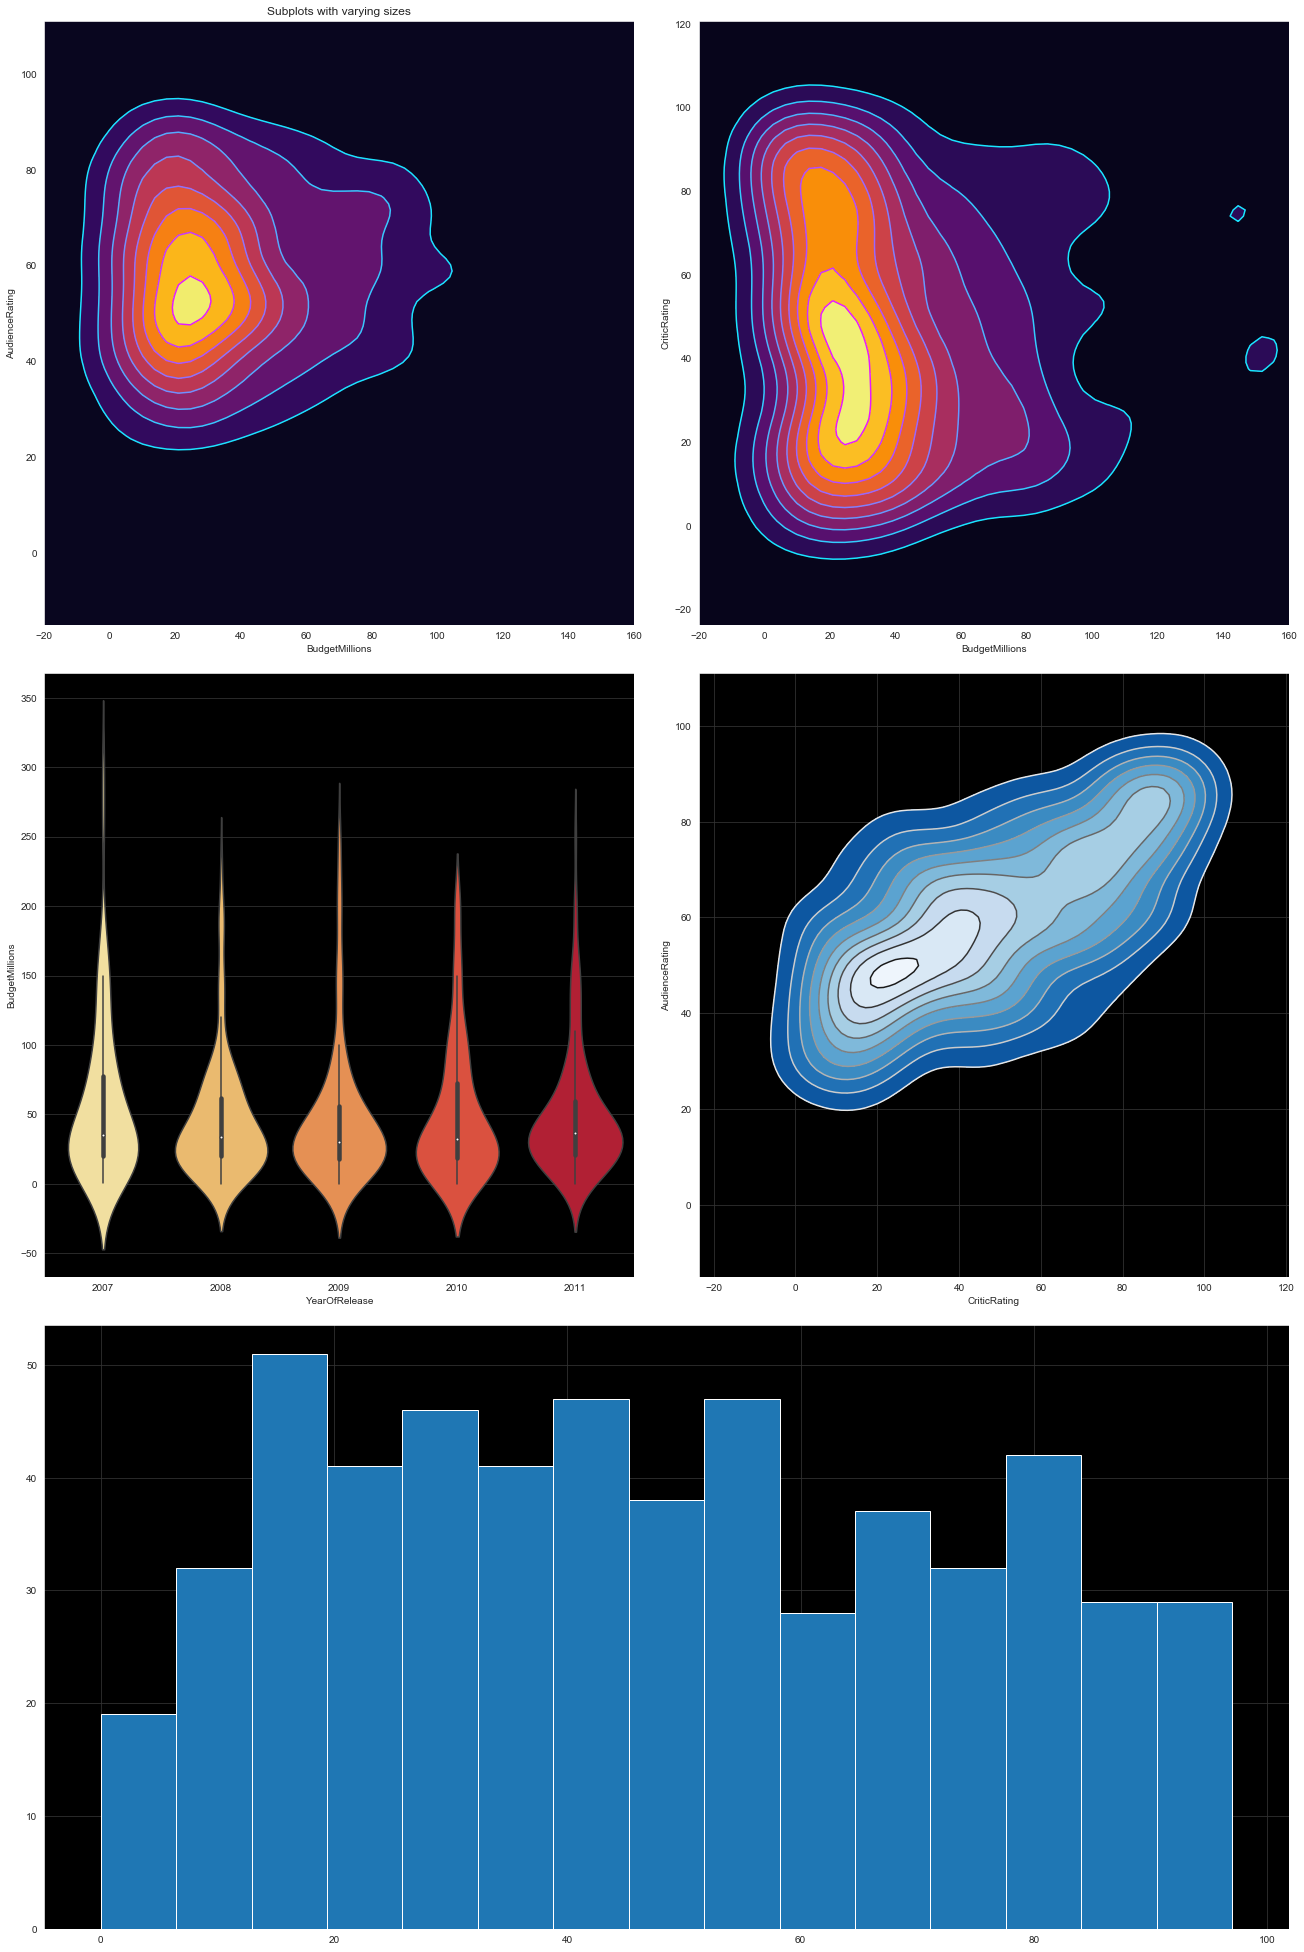

In [47]:
grid = plt.figure(constrained_layout=True, figsize=(18, 27))

gf = grid.add_gridspec(3, 2)

g1Ax = grid.add_subplot(gf[0, :-1])
g1Ax.set_title('Subplots with varying sizes')

g2Ax = grid.add_subplot(gf[0, -1])

g3Ax = grid.add_subplot(gf[1, :-1])

g4Ax = grid.add_subplot(gf[1, -1])

g5Ax = grid.add_subplot(gf[2, :])

# Plot [0, 0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=g1Ax, \
    shade=True, shade_lowest=True, cmap='inferno')
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=g1Ax, \
    cmap='cool')
k1.set(xlim=(-20, 160))


# Plot [0, 1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=g2Ax, \
    shade=True, shade_lowest=True, cmap='inferno')
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=g2Ax, \
    cmap='cool')
k2.set(xlim=(-20, 160))

# Plot [1, 0]
z1 = sns.violinplot(data=movies, x='YearOfRelease', y='BudgetMillions', ax=g3Ax, \
    palette='YlOrRd')

# Plot [1, 1]
kde1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r', ax=g4Ax)
kde1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=g4Ax)

# Plot [2, 0]
g5Ax.hist(movies.CriticRating, bins=15)

plt.show()

In [48]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [49]:
import re

movies2 = movies
movies2.index.names

In [51]:
movies2.set_index(['Film', 'Genre', 'YearOfRelease']).groupby(['Genre', 'YearOfRelease']).count()['CriticRating']['Action'][2008]

In [61]:
movies2['Genre_Adventure'] = movies2.Genre.str.contains('adventure', case=False) * 1
movies2.head()

Film      Genre  CriticRating  AudienceRating  \
0  (500) Days of Summer      Comedy            87              81   
1            10,000 B.C.  Adventure             9              44   
2             12 Rounds      Action            30              52   
3              127 Hours  Adventure            93              84   
4              17 Again      Comedy            55              70   

   BudgetMillions YearOfRelease  Genre_Adventure  
0               8          2009                0  
1             105          2008                1  
2              20          2009                0  
3              18          2010                1  
4              20          2009                0

In [62]:
movies2.Genre_Adventure.sum()

29

# Thematic Edits
- Styling Stacked Histogram

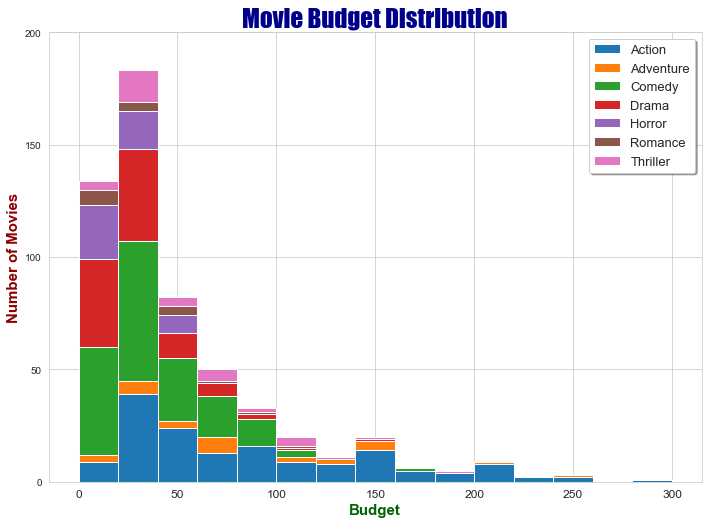

In [107]:
sns.set_style('whitegrid', {'grid.color': '.8'})

gList3, lbls1 = createStackedList(movies, 'Genre', 'BudgetMillions')

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # size of A4 paper
# sp1 = plt.hist(gList3, bins=15, stacked=True, rwidth=1, label=lbls1, \
#     color=['Red', 'Salmon', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple'])
sp1 = plt.hist(gList3, bins=15, stacked=True, rwidth=1, label=lbls1)
plt.title('Movie Budget Distribution', fontsize=25, fontweight='bold', color='DarkBlue', fontname='Impact')
plt.ylabel('Number of Movies', fontsize=15, color='DarkRed', fontweight='bold')
plt.xlabel('Budget', fontsize=15, color='DarkGreen', fontweight='bold')
plt.yticks(list(range(0, 201, 50)), fontsize=10)
plt.xticks(fontsize=12)
plt.legend(prop={'size': 13}, frameon=True, fancybox=True, shadow=True, framealpha=1)
plt.show()

# Summary
1. Category data type in Python
2. JointPlots
3. Histograms
4. Stacked Histograms
5. KDE Plot 
6. Using the Subplots() function 
7. Violinplots 
8. Creating a Facet Grid 
9. Coordinates and Diagonals
10. Building Dashboards 
11. Styling Tips 
12. Finishing Touches 